In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [1]:
folder_path = r"C:\Users\vatch\Downloads\archive (39)\cats_set"


NameError: name 'df' is not defined

In [9]:
def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []  # Assuming we will assign labels based on folder names like 'cats' and 'dogs'
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.exists(img_path):
            img = load_img(img_path, target_size=img_size)  # Resize image
            img = img_to_array(img) / 255.0  # Normalize the pixel values
            images.append(img)

            # Assuming folder names are 'cats' and 'dogs' for labels
            if 'cat' in filename.lower():
                labels.append(0)  # Label for cat images
            elif 'dog' in filename.lower():
                labels.append(1)  # Label for dog images

    return np.array(images), np.array(labels)

In [10]:
X, y = load_images_from_folder(folder_path)


In [11]:
print("Loaded images:", X.shape)
print("Labels:", y[:10])  

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Loaded images: (500, 64, 64, 3)
Labels: [0 0 0 0 0 0 0 0 0 0]


In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', strides=2, input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])

In [14]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7742 - loss: 0.2021 - val_accuracy: 1.0000 - val_loss: 1.6841e-07
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 4.0127e-07 - val_accuracy: 1.0000 - val_loss: 3.7015e-09
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 4.3108e-09 - val_accuracy: 1.0000 - val_loss: 1.1338e-09
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 5.4190e-09 - val_accuracy: 1.0000 - val_loss: 7.9589e-10
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 2.1895e-09 - val_accuracy: 1.0000 - val_loss: 7.1846e-10
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 1.0983e-09 - val_accuracy: 1.0000 - val_loss: 6.9795e-10
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 1.9854e-09 - val_accuracy: 1.0000 - val_loss: 6.9227e-10
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accura

In [15]:
test_loss, test_acc = model.evaluate(X_val, y_val)
print(f"Test Accuracy: {test_acc}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 6.0273e-10
Test Accuracy: 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


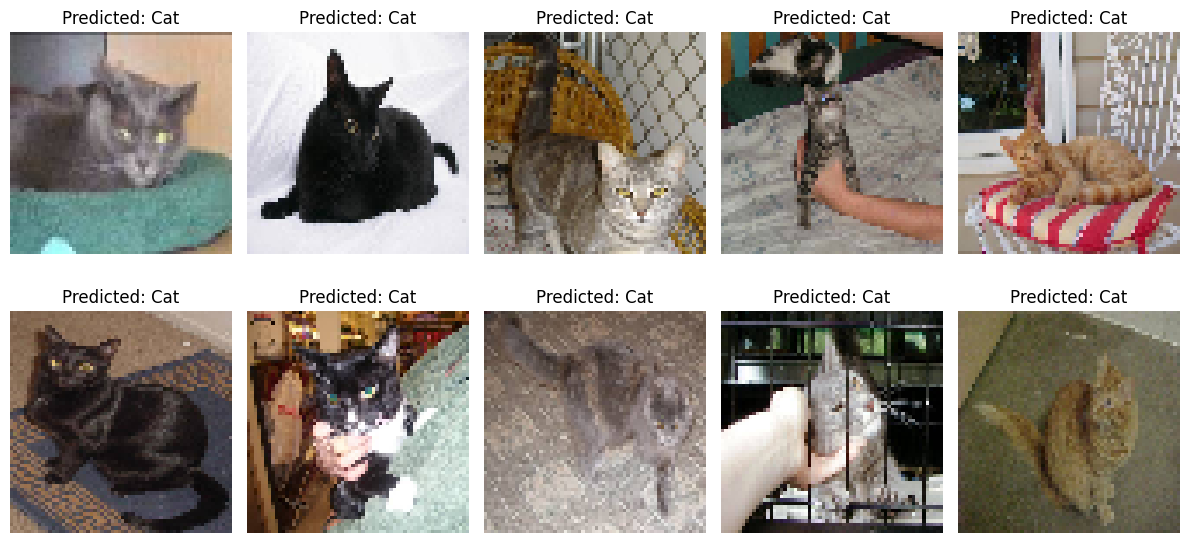

In [16]:
predictions = model.predict(X_val[:10])

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X_val[i])
    axes[i].set_title(f"Predicted: {'Dog' if predictions[i] > 0.5 else 'Cat'}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()
